<a href="https://colab.research.google.com/github/Priya-1203/Time-series-assignment/blob/main/Trend_and_seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def moving_average_odd(data, q):
  #  Moving average for odd number of data points
    n = len(data)
    m_t = np.zeros(n)

    for t in range(q, n - q):
        m_t[t] = np.mean(data[t-q:t+q+1])

    return m_t

def moving_average_even(data, q):

  # Moving average for even number of data points.
    n = len(data)
    m_t = np.zeros(n)
    d = 2*q

    for t in range(q, n - q):
        m_t[t] = (0.5 * data[t-q] + np.sum(data[t-q+1:t+q]) + 0.5 * data[t+q]) / d

    return m_t

def calculate_w_k(data, trend, d):

  # Calculate w_k (seasonality and irregularity).
    n = len(data)
    w_k = np.zeros(n)

    for k in range(n):
        summation = 0
        count = 0
        for j in range(-(n // d), n // d):
            if 0 <= k + j*d < n:
                summation += data[k + j*d] - trend[k + j*d]
                count += 1
        if count > 0:
            w_k[k] = summation / count

    return w_k

def calculate_g_k(w_k, d):

  # Calculate g_k (seasonality).
    n = len(w_k)
    avg_w = np.mean(w_k)
    g_k = np.zeros(n)

    for k in range(n):
        g_k[k] = w_k[k] - avg_w

    return g_k


data = np.array([0,4,8,7,3,1,5,8,15,13,10])
q = 3

if len(data) % 2 == 1:
    trend = moving_average_odd(data, q)
else:
    trend = moving_average_even(data, q)

w_k = calculate_w_k(data, trend, q)
g_k = calculate_g_k(w_k, q)

print("Trend:", trend)
print("Seasonality:", g_k)
print(w_k)

Trend: [0.         0.         0.         4.         5.14285714 6.71428571
 7.42857143 7.85714286 0.         0.         0.        ]
Seasonality: [-3.20238095e+00 -2.72619048e+00  2.36904762e+00 -4.44089210e-16
 -3.92857143e-01  2.36904762e+00 -4.44089210e-16 -3.92857143e-01
  2.36904762e+00 -4.44089210e-16 -3.92857143e-01]
[0.19047619 0.66666667 5.76190476 3.39285714 3.         5.76190476
 3.39285714 3.         5.76190476 3.39285714 3.        ]


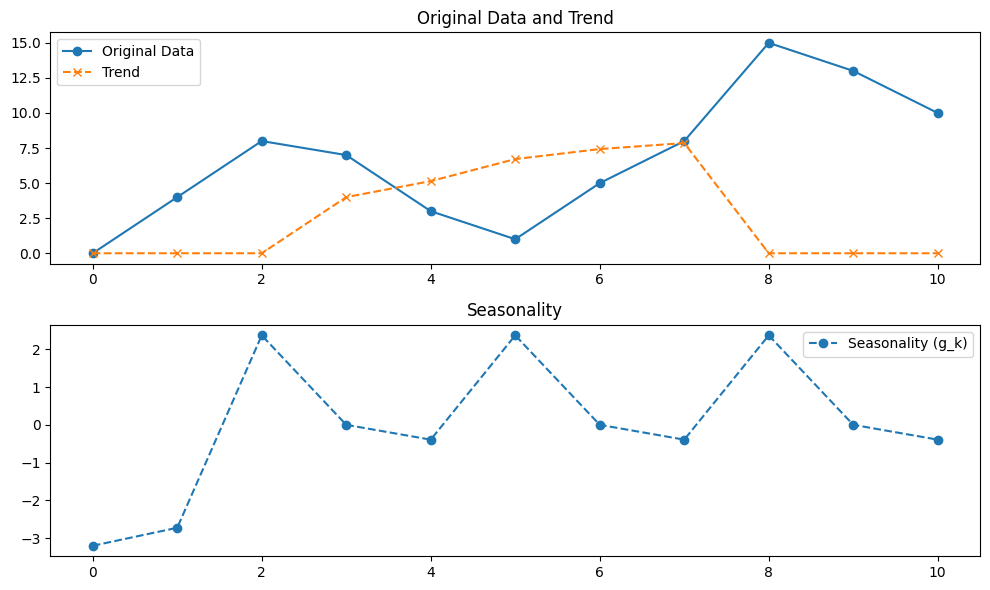

In [2]:
import matplotlib.pyplot as plt
# Plotting the graphs
plt.figure(figsize=(10, 6))

# Plot original data and trend
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Data', marker='o')
plt.plot(trend, label='Trend', marker='x', linestyle='--')
plt.title('Original Data and Trend')
plt.legend()

# Plot seasonality (g_k)
plt.subplot(2, 1, 2)
plt.plot(g_k, label='Seasonality (g_k)', marker='o', linestyle='--')
plt.title('Seasonality')
plt.legend()

plt.tight_layout()
plt.show()